## Fashion MNIST Dataset Classification
- Link: https://rakibul-hassan.gitbook.io/deep-learning/start-page/mnist-fashion 

## Loading dataset

In [54]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [85]:
from keras.datasets import fashion_mnist

# (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

fashion_mnist = (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [86]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [87]:
train_images.shape

(60000, 28, 28)

In [88]:
len(train_labels)

60000

In [89]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [90]:
test_images.shape

(10000, 28, 28)

In [91]:
len(test_labels)

10000

In [92]:
print(train_labels[0])
print('\Training Image:')
print(train_images[0])

9
\Training Image:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1

## Example Images from Dataset

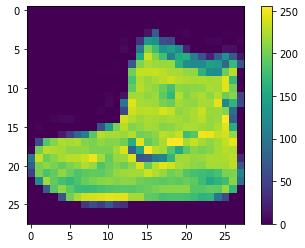

In [93]:
# lets check the first image
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Data Normalization
আমাদের ডাটাগুলোকে এমনভাবে প্রি-প্রসেস করতে হবে যাতে সেটা ঠিকমতো কাজ করতে পারে। যেহেতু আমাদের ইনপুট ভ্যারিয়েবলব্গুলো গ্রেস্কেল মানে ০ থেকে ২৫৫ পর্যন্ত রেঞ্জ, সে কারণে আমরা সেটাকে ০ থেকে ১ এর মধ্যে নিয়ে আসব। আমাদের ট্রেনিং এবং টেস্ট সেট দুটোকেই এই নরমালাইজেশন এর মধ্যে নিয়ে আসতে হবে। এটা করার জন্য আমাদেরকে প্রতিটা ইমেজকে ২৫৫ দিয়ে ভাগ করতে হবে। তাহলে সেটা ০ থেকে ১ এর মধ্যে চলে আসবে।

In [94]:
train_images = train_images / 255.0

test_images = test_images / 255.0

ডেটাগুলো ঠিকমতো ফরম্যাটে আছে কিনা? যেহেতু আমরা এই ডাটাগুলোকে ট্রেনিংয়ে ব্যবহার করবো, সেকারণে প্রথম ২৫টা ছবিকে ডিসপ্লে করি। যেহেতু আমরা আগেই ক্লাস ডিক্লেয়ার করেছিলাম সেকারণে নিচে সেটার নাম দেখা যাবে।

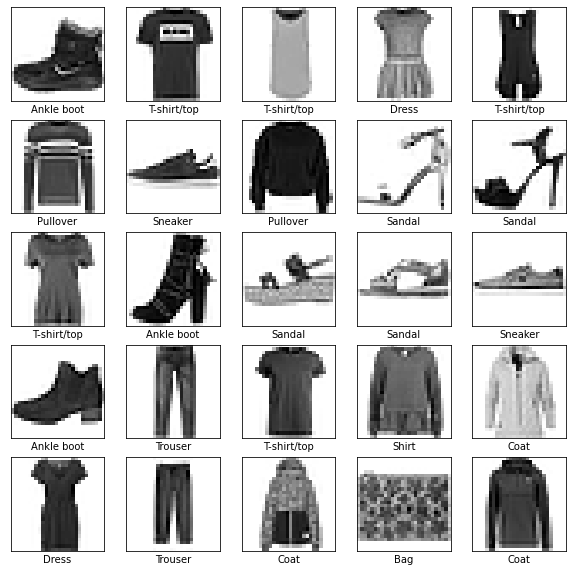

In [95]:
# lets see first 25 images
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Creating Model

In [96]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

## Compile Model

In [97]:
model.compile(optimizer='adam',
             loss= 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

## Train Model

In [99]:
model.fit(train_images, train_labels, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2309 - accuracy: 0.9136
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2238 - accuracy: 0.9160
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2172 - accuracy: 0.9192
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2120 - accuracy: 0.9203
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2050 - accuracy: 0.9234
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1989 - accuracy: 0.9243
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1933 - accuracy: 0.9285
Epoch 8/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1873 - accuracy: 0.9298
Epoch 9/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1842 - accuracy: 0.9299
Epoch 10/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.180

## Evaluate the Model

In [109]:
# model.evaluate(test_images, test_labels)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy: {:.2f}%'.format(test_acc * 100))
print('Loss: {:.3f}'.format(test_loss))

313/313 [==============================] - 0s 1ms/step - loss: 0.4411 - accuracy: 0.8882

Test accuracy: 88.82%
Loss: 0.441


## Prediction

In [112]:
predictions = model.predict(test_images)

In [113]:
predictions[0]

array([1.6468507e-19, 1.0944089e-21, 1.2095538e-20, 4.0190949e-21,
       2.4575463e-20, 5.6500387e-08, 3.7178088e-20, 4.2196882e-09,
       1.6984432e-16, 9.9999988e-01], dtype=float32)

In [115]:
np.argmax(predictions[0])

9

In [116]:
test_labels[0]

9

In [119]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

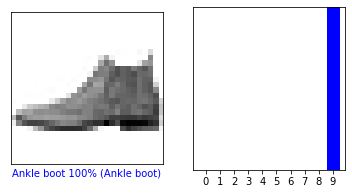

In [120]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

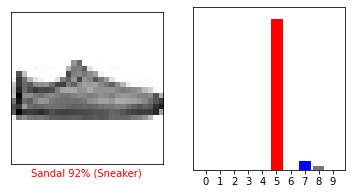

In [121]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

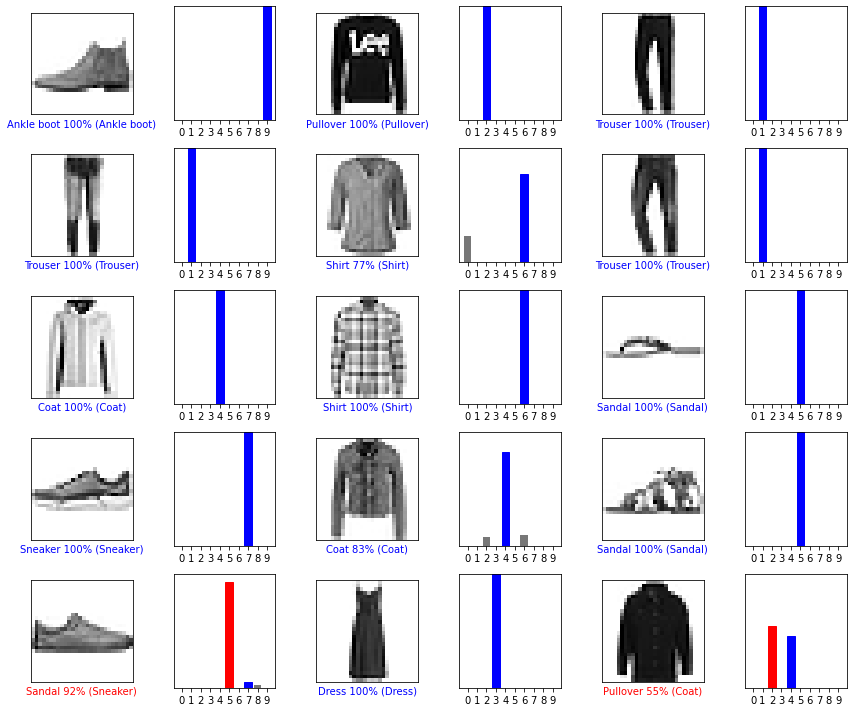

In [123]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [124]:
img = test_images[1]

print(img.shape)

(28, 28)


In [126]:
img = (np.expand_dims(img, 0))

print(img.shape)

(1, 1, 28, 28)


In [127]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.6639689e-05 9.8187270e-23 9.9990606e-01 1.1507976e-14 7.7325349e-05
  2.1247455e-15 3.9011674e-08 5.2989214e-33 2.1749986e-16 1.1089840e-23]]


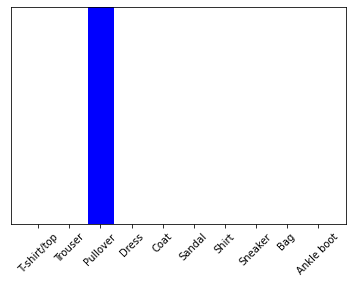

In [129]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [130]:
np.argmax(predictions_single[0])

2

## Callback

In [131]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4745 - accuracy: 0.8304
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3585 - accuracy: 0.8689
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3221 - accuracy: 0.8820
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2990 - accuracy: 0.8882
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2791 - accuracy: 0.8961
Epoch 6/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.2642 - accuracy: 0.9014
Reached 90% accuracy so cancelling training!
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2640 - accuracy: 0.9014


## Summary of the Model

In [133]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
